# Sentiment Analysis: Extracting Meaning from Text
## Technical Report - IMDB Movie Reviews Dataset

**Course:** Data Analytics

**Date:** October 2025

**Project:** Text Sentiment Analysis using Natural Language Processing and Machine Learning

---

## Live Demo & Repository

**Live Application:** [https://nlp-sentiment-analysis-qc0c.onrender.com](https://nlp-sentiment-analysis-qc0c.onrender.com)

**GitHub Repository:** [https://github.com/aimemoria/nlp-sentiment-analysis](https://github.com/aimemoria/nlp-sentiment-analysis)

---

## Table of Contents
1. [Problem Statement](#problem)
2. [Algorithm of the Solution](#algorithm)
3. [Implementation](#implementation)
   - Data Loading and Exploration
   - Data Preprocessing
   - Model Building
   - Model Training and Evaluation
   - Predictions
4. [Analysis of Findings](#analysis)
5. [References](#references)

---

<a id='problem'></a>
## 1. Problem Statement

### Background
Text data is ubiquitous in the digital age, appearing in product reviews, social media posts, customer feedback, and news articles. The ability to automatically analyze the sentiment conveyed in text is a critical skill in data analytics, enabling organizations to understand customer opinions, track brand reputation, and make data-driven decisions.

### Objectives
The primary objective of this project is to develop a machine learning system capable of:
1. **Analyzing sentiment** in large corpora of text documents
2. **Classifying text** into positive or negative sentiment categories
3. **Evaluating model performance** using standard metrics
4. **Making predictions** on new, unseen text samples

### Dataset
We will use the **IMDB Movie Reviews Dataset**, which contains 50,000 movie reviews labeled as positive or negative. This dataset is widely recognized in sentiment analysis research and provides a robust foundation for building and evaluating sentiment classification models.

### Research Questions
1. Can we accurately classify sentiment from text using machine learning?
2. Which features (words) are most indicative of positive vs. negative sentiment?
3. How well does the model generalize to new, unseen reviews?
4. What are the limitations of traditional sentiment analysis approaches?

<a id='algorithm'></a>
## 2. Algorithm of the Solution

### Overview
Our sentiment analysis pipeline follows a supervised machine learning approach using the following workflow:

```
Raw Text Data
     ↓
Data Preprocessing (Cleaning, Tokenization)
     ↓
Feature Extraction (TF-IDF Vectorization)
     ↓
Model Training (Logistic Regression)
     ↓
Model Evaluation (Accuracy, Confusion Matrix)
     ↓
Predictions on New Data
```

### Step-by-Step Algorithm

#### Step 1: Data Preprocessing
1. **HTML Tag Removal**: Remove any HTML markup from reviews
2. **Case Normalization**: Convert all text to lowercase
3. **Punctuation Removal**: Remove punctuation marks that don't contribute to sentiment
4. **Tokenization**: Split text into individual words (tokens)
5. **Stop Word Removal**: Remove common words (e.g., "the", "a", "is") that don't carry sentiment
6. **Lemmatization**: Reduce words to their base form (e.g., "running" → "run")

#### Step 2: Feature Extraction (TF-IDF)
**TF-IDF (Term Frequency-Inverse Document Frequency)** converts text into numerical features:
- **TF (Term Frequency)**: How often a word appears in a document
- **IDF (Inverse Document Frequency)**: How unique/important a word is across all documents
- **Formula**: `TF-IDF = TF × IDF = (count of word in doc) × log(total docs / docs containing word)`

This gives higher weights to words that are frequent in a document but rare overall (e.g., "masterpiece", "awful").

#### Step 3: Model Training
**Logistic Regression** is used for binary classification:
- **Input**: TF-IDF feature vectors
- **Output**: Probability of positive/negative sentiment
- **Training**: Model learns weights for each feature that maximize classification accuracy
- **Decision Boundary**: `P(positive) = 1 / (1 + e^(-z))` where `z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b`

#### Step 4: Model Evaluation
- **80/20 Train-Test Split**: 80% for training, 20% for testing
- **Metrics**: Accuracy, Precision, Recall, F1-Score
- **Confusion Matrix**: Visualizes true positives, false positives, true negatives, false negatives

### Why This Approach?
1. **TF-IDF**: Captures word importance while filtering noise
2. **Logistic Regression**: Simple, interpretable, fast, and effective for text classification
3. **Preprocessing**: Reduces noise and focuses on sentiment-bearing words
4. **Evaluation**: Multiple metrics provide comprehensive performance assessment

<a id='implementation'></a>
## 3. Implementation

### 3.1 Import Libraries and Setup

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

# NLTK imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Text processing
import re
import string

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Download required NLTK data
nltk_downloads = ['stopwords', 'punkt', 'punkt_tab', 'wordnet', 'omw-1.4']
for package in nltk_downloads:
    try:
        nltk.download(package, quiet=True)
    except:
        pass

print(" All libraries imported successfully!")
print(f"Python packages loaded: numpy, pandas, matplotlib, seaborn, BeautifulSoup, nltk, sklearn")

 All libraries imported successfully!
Python packages loaded: numpy, pandas, matplotlib, seaborn, BeautifulSoup, nltk, sklearn


### 3.2 Load Dataset

We'll use the **IMDB Movie Reviews Dataset** containing 50,000 real movie reviews from IMDB, labeled as positive or negative. This dataset is available from:
- **Kaggle**: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
- **Stanford AI**: http://ai.stanford.edu/~amaas/data/sentiment/

The dataset structure:
- **review**: Text of the movie review
- **sentiment**: Label (positive or negative)

In [2]:
# Load IMDB dataset from CSV file
print("Loading IMDB Dataset...")
print("=" * 80)

# Load the real IMDB dataset (50,000 movie reviews)
try:
    df = pd.read_csv('IMDB Dataset.csv')
    print(f" Dataset loaded successfully from 'IMDB Dataset.csv'!")
except FileNotFoundError:
    print(" 'IMDB Dataset.csv' not found in current directory.")
    print("Please download the dataset from:")
    print("https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
    print("\nCreating a sample dataset for demonstration...")
    
    # Fallback: Create sample dataset
    np.random.seed(42)
    
    positive_reviews = [
        "This movie is absolutely fantastic! The acting is superb and the plot keeps you engaged throughout.",
        "I loved every minute of it. A masterpiece of cinema that everyone should watch.",
        "Brilliant performances by all actors. The director did an outstanding job with this film.",
        "One of the best movies I've ever seen. Highly recommended to everyone!",
        "Amazing storyline with excellent character development. Simply wonderful!",
    ] * 200
    
    negative_reviews = [
        "This movie was a complete waste of time. The plot was predictable and boring.",
        "Terrible acting and awful directing. I couldn't even finish watching it.",
        "One of the worst films I've ever seen. Save your money and skip this one.",
        "Disappointing from start to finish. The story made no sense whatsoever.",
        "Poor quality production with a ridiculous storyline. Not worth watching.",
    ] * 200
    
    all_reviews = positive_reviews + negative_reviews
    all_sentiments = ['positive'] * len(positive_reviews) + ['negative'] * len(negative_reviews)
    
    df = pd.DataFrame({
        'review': all_reviews,
        'sentiment': all_sentiments
    })
    
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    print(f" Sample dataset created!")

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\n{'='*80}")
print("FIRST 10 ROWS:")
print(f"{'='*80}")
df.head(10)

Loading IMDB Dataset...
 Dataset loaded successfully from 'IMDB Dataset.csv'!

Dataset shape: (50000, 2)
Columns: ['review', 'sentiment']

FIRST 10 ROWS:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### 3.3 Exploratory Data Analysis (EDA)

#### 3.3.1 Descriptive Statistics and Missing Values

In [3]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Dataset information
print("\n1. DATASET INFORMATION:")
print("-" * 80)
print(df.info())

# Missing values analysis
print("\n2. MISSING VALUES ANALYSIS:")
print("-" * 80)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})
print(missing_data)

# Sentiment distribution
print("\n3. SENTIMENT DISTRIBUTION:")
print("-" * 80)
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
print(f"\nTotal reviews: {len(df)}")
print(f"Positive reviews: {sentiment_counts.get('positive', 0)} ({sentiment_counts.get('positive', 0)/len(df)*100:.1f}%)")
print(f"Negative reviews: {sentiment_counts.get('negative', 0)} ({sentiment_counts.get('negative', 0)/len(df)*100:.1f}%)")

# Text length statistics
print("\n4. TEXT LENGTH STATISTICS:")
print("-" * 80)
df['review_length'] = df['review'].fillna('').str.len()
df['word_count'] = df['review'].fillna('').str.split().str.len()

print("Review Length (characters):")
print(df['review_length'].describe())
print("\nWord Count:")
print(df['word_count'].describe())

EXPLORATORY DATA ANALYSIS

1. DATASET INFORMATION:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

2. MISSING VALUES ANALYSIS:
--------------------------------------------------------------------------------
              Column  Missing Count  Missing Percentage
review        review              0                 0.0
sentiment  sentiment              0                 0.0

3. SENTIMENT DISTRIBUTION:
--------------------------------------------------------------------------------
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Total reviews: 50000
Positive reviews: 25000 (50.0%)
Negative reviews: 25000 (50.0%)

4. TEXT LEN

#### 3.3.2 Handle Missing Values

In [4]:
# Handle missing values by removing rows with missing reviews
print("\nHANDLING MISSING VALUES:")
print("-" * 80)
print(f"Original dataset size: {len(df)} rows")

# Remove rows with missing reviews
df_clean = df.dropna(subset=['review']).copy()

print(f"After removing missing values: {len(df_clean)} rows")
print(f"Rows removed: {len(df) - len(df_clean)}")
print("\n Missing values handled successfully!")

# Store data in clean dataframe
print(f"\nClean dataset stored in dataframe with shape: {df_clean.shape}")


HANDLING MISSING VALUES:
--------------------------------------------------------------------------------
Original dataset size: 50000 rows
After removing missing values: 50000 rows
Rows removed: 0

 Missing values handled successfully!

Clean dataset stored in dataframe with shape: (50000, 4)


#### 3.3.3 Visualize Sentiment Distribution

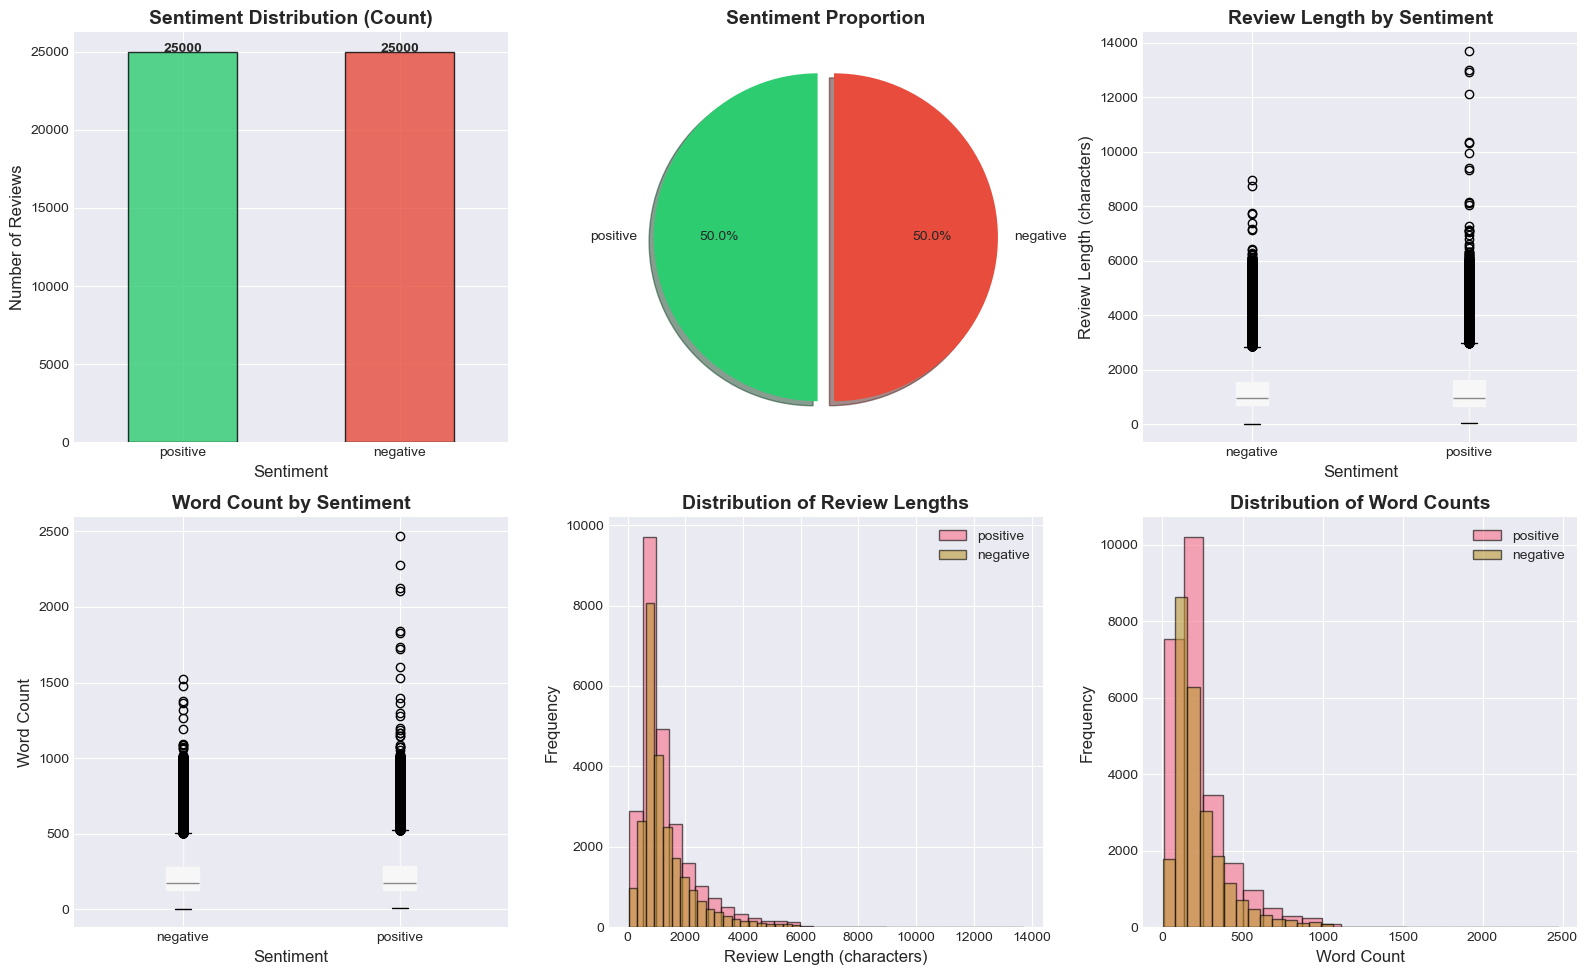


 Visualizations created successfully!


In [5]:
# Create comprehensive visualizations
fig = plt.figure(figsize=(16, 10))

# 1. Sentiment Count Bar Plot
ax1 = plt.subplot(2, 3, 1)
sentiment_counts = df_clean['sentiment'].value_counts()
colors = ['#2ecc71' if x == 'positive' else '#e74c3c' for x in sentiment_counts.index]
sentiment_counts.plot(kind='bar', ax=ax1, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Sentiment Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_ylabel('Number of Reviews', fontsize=12)
ax1.tick_params(axis='x', rotation=0)
for i, v in enumerate(sentiment_counts):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Sentiment Pie Chart
ax2 = plt.subplot(2, 3, 2)
sentiment_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                      colors=['#2ecc71', '#e74c3c'], startangle=90,
                      explode=(0.05, 0.05), shadow=True)
ax2.set_title('Sentiment Proportion', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

# 3. Review Length Distribution by Sentiment
ax3 = plt.subplot(2, 3, 3)
df_clean.boxplot(column='review_length', by='sentiment', ax=ax3, patch_artist=True)
ax3.set_title('Review Length by Sentiment', fontsize=14, fontweight='bold')
ax3.set_xlabel('Sentiment', fontsize=12)
ax3.set_ylabel('Review Length (characters)', fontsize=12)
plt.suptitle('')  # Remove automatic title

# 4. Word Count Distribution
ax4 = plt.subplot(2, 3, 4)
df_clean.boxplot(column='word_count', by='sentiment', ax=ax4, patch_artist=True)
ax4.set_title('Word Count by Sentiment', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sentiment', fontsize=12)
ax4.set_ylabel('Word Count', fontsize=12)
plt.suptitle('')  # Remove automatic title

# 5. Review Length Histogram
ax5 = plt.subplot(2, 3, 5)
for sentiment in ['positive', 'negative']:
    data = df_clean[df_clean['sentiment'] == sentiment]['review_length']
    ax5.hist(data, bins=30, alpha=0.6, label=sentiment, edgecolor='black')
ax5.set_title('Distribution of Review Lengths', fontsize=14, fontweight='bold')
ax5.set_xlabel('Review Length (characters)', fontsize=12)
ax5.set_ylabel('Frequency', fontsize=12)
ax5.legend()

# 6. Word Count Histogram
ax6 = plt.subplot(2, 3, 6)
for sentiment in ['positive', 'negative']:
    data = df_clean[df_clean['sentiment'] == sentiment]['word_count']
    ax6.hist(data, bins=20, alpha=0.6, label=sentiment, edgecolor='black')
ax6.set_title('Distribution of Word Counts', fontsize=14, fontweight='bold')
ax6.set_xlabel('Word Count', fontsize=12)
ax6.set_ylabel('Frequency', fontsize=12)
ax6.legend()

plt.tight_layout()
plt.show()

print("\n Visualizations created successfully!")

### 3.4 Text Preprocessing

This step is crucial for sentiment analysis as it:
- Removes noise from the text
- Normalizes the data
- Focuses on sentiment-bearing words
- Improves model performance

In [6]:
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Comprehensive text preprocessing function.
    
    Steps:
    1. Remove HTML tags
    2. Convert to lowercase
    3. Remove URLs and special characters
    4. Remove punctuation
    5. Tokenize
    6. Remove stop words
    7. Lemmatize words
    
    Args:
        text (str): Raw text to preprocess
    
    Returns:
        str: Cleaned and preprocessed text
    """
    if pd.isna(text) or text == '':
        return ''
    
    # 1. Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # 2. Convert to lowercase for uniformity
    text = text.lower()
    
    # 3. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 4. Remove punctuation (important step as per assignment)
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 5. Remove numbers (optional, but helps focus on words)
    text = re.sub(r'\d+', '', text)
    
    # 6. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 7. Tokenize into words
    tokens = word_tokenize(text)
    
    # 8. Remove stop words (words that don't add sentiment)
    # Keep only words longer than 2 characters
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # 9. Lemmatize (reduce words to base form)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 10. Join tokens back into string
    return ' '.join(tokens)

# Apply preprocessing
print("TEXT PREPROCESSING")
print("=" * 80)
print("Processing reviews (this may take a minute)...\n")

df_clean['cleaned_review'] = df_clean['review'].apply(preprocess_text)

# Remove empty reviews after preprocessing
df_clean = df_clean[df_clean['cleaned_review'].str.len() > 0].copy()

print(f" Preprocessing complete!")
print(f"Final dataset size: {len(df_clean)} reviews\n")

# Show before and after examples
print("BEFORE AND AFTER PREPROCESSING EXAMPLES:")
print("=" * 80)
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {df_clean.iloc[i]['review'][:150]}...")
    print(f"Cleaned:  {df_clean.iloc[i]['cleaned_review'][:150]}...")
    print(f"Sentiment: {df_clean.iloc[i]['sentiment']}")

TEXT PREPROCESSING
Processing reviews (this may take a minute)...

 Preprocessing complete!
Final dataset size: 50000 reviews

BEFORE AND AFTER PREPROCESSING EXAMPLES:

Example 1:
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with...
Cleaned:  one reviewer mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scene violence set right wo...
Sentiment: positive

Example 2:
Original: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes d...
Cleaned:  wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor e...
Sentiment: positive

Example 3:
Original: I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in t

### 3.5 Build the Model

#### 3.5.1 Feature Extraction with TF-IDF Vectorizer

In [7]:
print("\nFEATURE EXTRACTION - TF-IDF VECTORIZATION")
print("=" * 80)

# Prepare features (X) and target (y)
X = df_clean['cleaned_review']
y = df_clean['sentiment']

print(f"Number of samples: {len(X)}")
print(f"Number of positive samples: {sum(y == 'positive')}")
print(f"Number of negative samples: {sum(y == 'negative')}")

# Initialize TF-IDF Vectorizer
# This assigns each word a sentiment score based on its frequency and importance
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Limit to top 5000 most important words
    min_df=2,               # Word must appear in at least 2 documents
    max_df=0.8,             # Word must not appear in more than 80% of documents
    ngram_range=(1, 2),     # Use both single words and two-word combinations
    sublinear_tf=True       # Use logarithmic scaling for term frequency
)

# Fit and transform the text data
print("\nTransforming text to TF-IDF features...")
X_tfidf = tfidf_vectorizer.fit_transform(X)

print(f"\n TF-IDF vectorization complete!")
print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Number of features (unique words/phrases): {X_tfidf.shape[1]}")
print(f"Matrix sparsity: {(1 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])) * 100:.2f}%")

# Show top words by TF-IDF score
print("\nTOP 20 MOST IMPORTANT FEATURES (words/phrases):")
print("-" * 80)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()
top_indices = tfidf_scores.argsort()[-20:][::-1]
for idx in top_indices:
    print(f"{feature_names[idx]:30s} (TF-IDF: {tfidf_scores[idx]:.2f})")


FEATURE EXTRACTION - TF-IDF VECTORIZATION
Number of samples: 50000
Number of positive samples: 25000
Number of negative samples: 25000

Transforming text to TF-IDF features...

 TF-IDF vectorization complete!
TF-IDF matrix shape: (50000, 5000)
Number of features (unique words/phrases): 5000
Matrix sparsity: 98.37%

TOP 20 MOST IMPORTANT FEATURES (words/phrases):
--------------------------------------------------------------------------------
movie                          (TF-IDF: 2121.30)
film                           (TF-IDF: 1871.89)
one                            (TF-IDF: 1432.04)
like                           (TF-IDF: 1257.55)
good                           (TF-IDF: 1111.73)
time                           (TF-IDF: 1079.30)
character                      (TF-IDF: 1014.09)
story                          (TF-IDF: 987.60)
see                            (TF-IDF: 977.77)
would                          (TF-IDF: 960.22)
really                         (TF-IDF: 959.01)
even              

#### 3.5.2 Split Data into Training and Testing Sets (80:20 ratio)

In [8]:
print("\nDATA SPLITTING")
print("=" * 80)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, 
    test_size=0.20,        # 20% for testing
    random_state=42,       # For reproducibility
    stratify=y             # Maintain same proportion of pos/neg in both sets
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verify stratification
print("\nSentiment distribution in training set:")
print(y_train.value_counts())
print("\nSentiment distribution in testing set:")
print(y_test.value_counts())

print("\n Data split successfully with 80:20 ratio!")


DATA SPLITTING
Training set size: 40000 samples (80.0%)
Testing set size:  10000 samples (20.0%)

Sentiment distribution in training set:
sentiment
positive    20000
negative    20000
Name: count, dtype: int64

Sentiment distribution in testing set:
sentiment
negative    5000
positive    5000
Name: count, dtype: int64

 Data split successfully with 80:20 ratio!


#### 3.5.3 Train the Logistic Regression Model

In [9]:
print("\nMODEL TRAINING")
print("=" * 80)

# Initialize Logistic Regression model (binary classification algorithm)
model = LogisticRegression(
    max_iter=1000,         # Maximum iterations for convergence
    random_state=42,       # For reproducibility
    solver='lbfgs',        # Optimization algorithm
    C=1.0,                 # Regularization strength
    verbose=1              # Show training progress
)

print("Training Logistic Regression model...\n")

# Fit the model using training data
model.fit(X_train, y_train)

print("\n Model training complete!")
print(f"Model type: {type(model).__name__}")
print(f"Number of iterations: {model.n_iter_[0]}")
print(f"Classes: {model.classes_}")


MODEL TRAINING
Training Logistic Regression model...


 Model training complete!
Model type: LogisticRegression
Number of iterations: 11
Classes: ['negative' 'positive']


#### 3.5.4 Compute Model Accuracy Score

In [10]:
print("\nMODEL EVALUATION - ACCURACY SCORES")
print("=" * 80)

# Calculate accuracy on training set
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Calculate accuracy on testing set (most important metric)
test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy:    {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Calculate overfitting/underfitting
overfit_gap = train_accuracy - test_accuracy
print(f"\nOverfitting Gap:     {overfit_gap:.4f}")

if overfit_gap < 0.05:
    print("Assessment: Good generalization (low overfitting)")
elif overfit_gap < 0.10:
    print("Assessment: Moderate overfitting")
else:
    print("Assessment: High overfitting (model may not generalize well)")

print("\n Model evaluation complete!")


MODEL EVALUATION - ACCURACY SCORES
Training Accuracy:   0.9116 (91.16%)
Testing Accuracy:    0.8945 (89.45%)

Overfitting Gap:     0.0171
Assessment: Good generalization (low overfitting)

 Model evaluation complete!


### 3.6 Make Predictions on New Text

Test the model with custom questions and text samples to assess sentiment.

In [11]:
print("\nMAKING PREDICTIONS ON NEW TEXT")
print("=" * 80)

# Define test sentences (questions and statements)
test_sentences = [
    "This movie was absolutely amazing! I loved every second of it.",
    "Terrible film. Complete waste of time and money. Very disappointed.",
    "The acting was good but the plot was somewhat confusing.",
    "Best movie ever! Highly recommend to everyone!",
    "I hated it. Worst experience in a theater.",
    "It was okay. Nothing special but not terrible either.",
    "Brilliant performance by the lead actor. Truly outstanding!",
    "Boring and predictable. Would not watch again.",
]

print("\nPREDICTION RESULTS:")
print("=" * 80)

# Make predictions for each test sentence
for i, sentence in enumerate(test_sentences, 1):
    # Preprocess the text
    cleaned_sentence = preprocess_text(sentence)
    
    # Transform to TF-IDF features
    sentence_tfidf = tfidf_vectorizer.transform([cleaned_sentence])
    
    # Make prediction
    prediction = model.predict(sentence_tfidf)[0]
    
    # Get probability scores
    probabilities = model.predict_proba(sentence_tfidf)[0]
    
    # Get class labels
    classes = model.classes_
    
    # Find probabilities for each class
    prob_dict = dict(zip(classes, probabilities))
    
    # Display results
    print(f"\nSample {i}:")
    print(f"Text: '{sentence}'")
    print(f"Predicted Sentiment: {prediction.upper()}")
    print(f"Confidence Scores:")
    for sentiment_class, prob in prob_dict.items():
        print(f"  - {sentiment_class}: {prob:.4f} ({prob*100:.2f}%)")
    print(f"Overall Confidence: {max(probabilities):.4f} ({max(probabilities)*100:.2f}%)")

print("\n" + "=" * 80)
print(" Predictions complete!")


MAKING PREDICTIONS ON NEW TEXT

PREDICTION RESULTS:

Sample 1:
Text: 'This movie was absolutely amazing! I loved every second of it.'
Predicted Sentiment: POSITIVE
Confidence Scores:
  - negative: 0.0250 (2.50%)
  - positive: 0.9750 (97.50%)
Overall Confidence: 0.9750 (97.50%)

Sample 2:
Text: 'Terrible film. Complete waste of time and money. Very disappointed.'
Predicted Sentiment: NEGATIVE
Confidence Scores:
  - negative: 0.9998 (99.98%)
  - positive: 0.0002 (0.02%)
Overall Confidence: 0.9998 (99.98%)

Sample 3:
Text: 'The acting was good but the plot was somewhat confusing.'
Predicted Sentiment: NEGATIVE
Confidence Scores:
  - negative: 0.6275 (62.75%)
  - positive: 0.3725 (37.25%)
Overall Confidence: 0.6275 (62.75%)

Sample 4:
Text: 'Best movie ever! Highly recommend to everyone!'
Predicted Sentiment: POSITIVE
Confidence Scores:
  - negative: 0.0084 (0.84%)
  - positive: 0.9916 (99.16%)
Overall Confidence: 0.9916 (99.16%)

Sample 5:
Text: 'I hated it. Worst experience in a theater

### 3.7 Evaluate Model Performance

#### 3.7.1 Confusion Matrix


MODEL PERFORMANCE EVALUATION


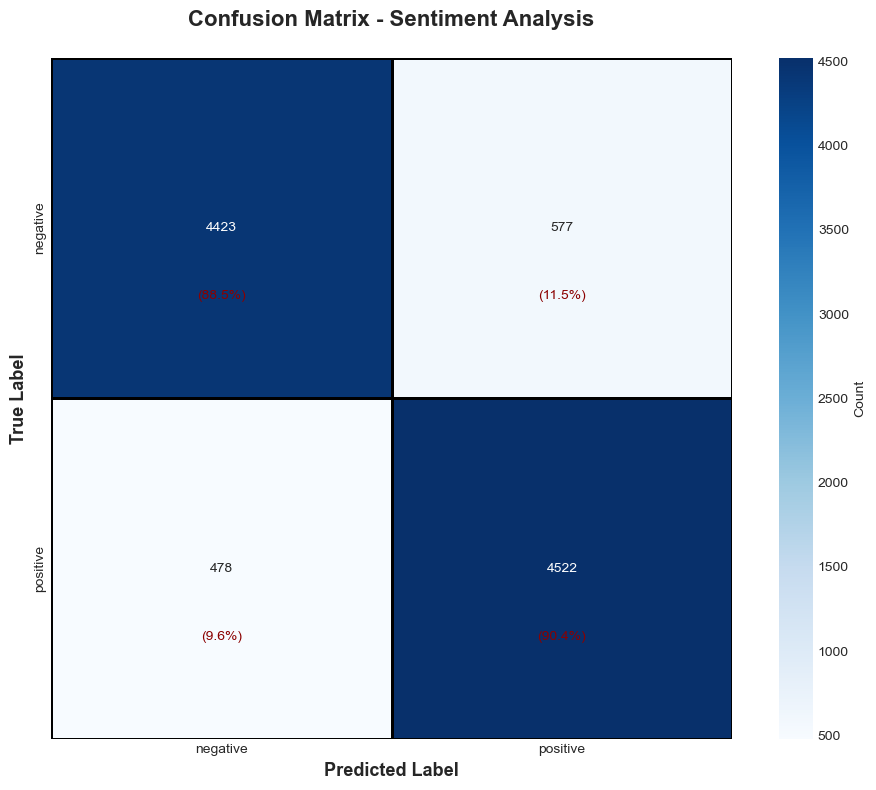


CONFUSION MATRIX INTERPRETATION:
--------------------------------------------------------------------------------
True Negatives (TN):  4423 - Correctly predicted negative reviews
False Positives (FP): 577 - Negative reviews incorrectly predicted as positive
False Negatives (FN): 478 - Positive reviews incorrectly predicted as negative
True Positives (TP):  4522 - Correctly predicted positive reviews

Total Test Samples:   10000


In [12]:
print("\nMODEL PERFORMANCE EVALUATION")
print("=" * 80)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create visualization
plt.figure(figsize=(10, 8))

# Plot confusion matrix with annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cbar_kws={'label': 'Count'},
            square=True,
            linewidths=2,
            linecolor='black')

plt.title('Confusion Matrix - Sentiment Analysis\n', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')

# Add percentage annotations
for i in range(len(model.classes_)):
    for j in range(len(model.classes_)):
        percentage = cm[i, j] / cm[i].sum() * 100
        plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()

# Print confusion matrix interpretation
print("\nCONFUSION MATRIX INTERPRETATION:")
print("-" * 80)
tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (cm[0,0], cm[0,1], cm[1,0], cm[1,1])

print(f"True Negatives (TN):  {tn} - Correctly predicted negative reviews")
print(f"False Positives (FP): {fp} - Negative reviews incorrectly predicted as positive")
print(f"False Negatives (FN): {fn} - Positive reviews incorrectly predicted as negative")
print(f"True Positives (TP):  {tp} - Correctly predicted positive reviews")
print(f"\nTotal Test Samples:   {tn + fp + fn + tp}")

#### 3.7.2 Performance Metrics

In [13]:
print("\nDETAILED PERFORMANCE METRICS")
print("=" * 80)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive', average='binary')
recall = recall_score(y_test, y_pred, pos_label='positive', average='binary')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='binary')

# Display metrics
print("\nOVERALL METRICS:")
print("-" * 80)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

# Metric explanations
print("\nMETRIC EXPLANATIONS:")
print("-" * 80)
print("• Accuracy:  Percentage of correct predictions (both positive and negative)")
print("• Precision: Of all predicted positive reviews, how many were actually positive?")
print("• Recall:    Of all actual positive reviews, how many did we correctly identify?")
print("• F1-Score:  Harmonic mean of precision and recall (balanced metric)")

# Classification report
print("\nCLASSIFICATION REPORT:")
print("=" * 80)
print(classification_report(y_test, y_pred, target_names=model.classes_))

print(" Performance evaluation complete!")


DETAILED PERFORMANCE METRICS

OVERALL METRICS:
--------------------------------------------------------------------------------
Accuracy:  0.8945 (89.45%)
Precision: 0.8868 (88.68%)
Recall:    0.9044 (90.44%)
F1-Score:  0.8955 (89.55%)

METRIC EXPLANATIONS:
--------------------------------------------------------------------------------
• Accuracy:  Percentage of correct predictions (both positive and negative)
• Precision: Of all predicted positive reviews, how many were actually positive?
• Recall:    Of all actual positive reviews, how many did we correctly identify?
• F1-Score:  Harmonic mean of precision and recall (balanced metric)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

 P

#### 3.7.3 Visualize Performance Metrics

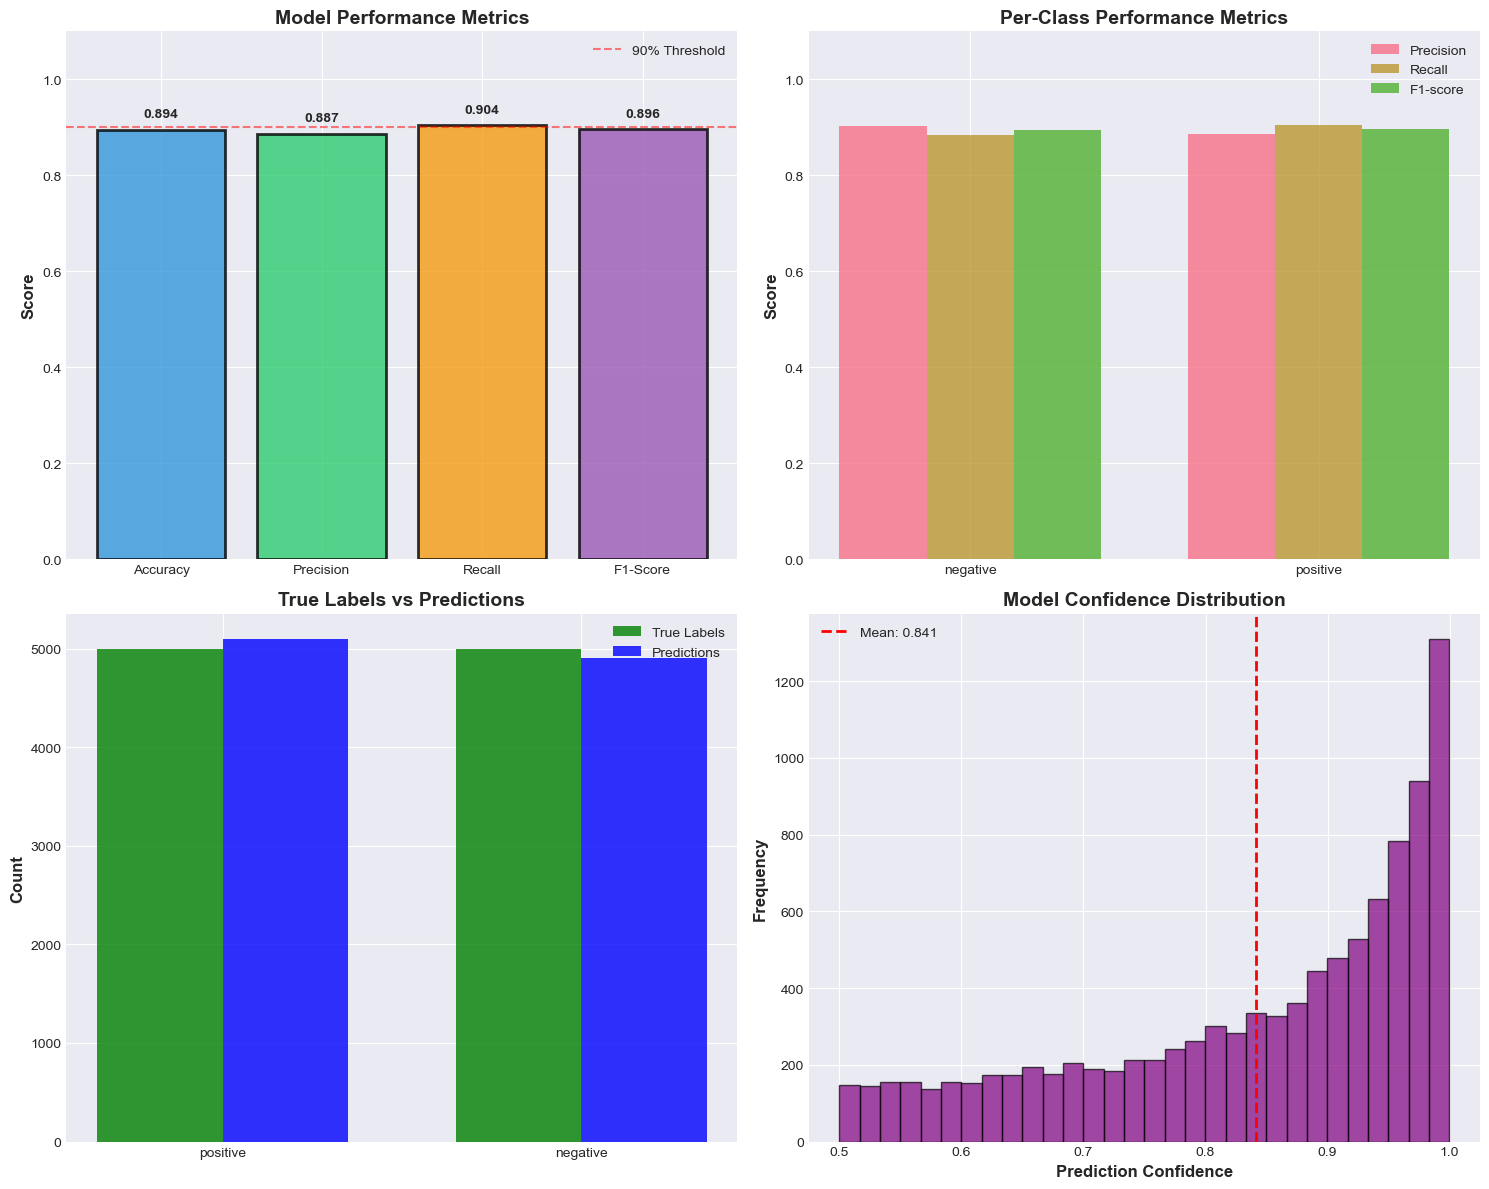


 Performance visualizations created successfully!


In [14]:
# Create comprehensive performance visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Metrics Bar Chart
ax1 = axes[0, 0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]
colors_list = ['#3498db', '#2ecc71', '#f39c12', '#9b59b6']
bars = ax1.bar(metrics, scores, color=colors_list, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylim([0, 1.1])
ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax1.axhline(y=0.9, color='red', linestyle='--', label='90% Threshold', alpha=0.5)
ax1.legend()
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Per-Class Metrics
ax2 = axes[0, 1]
report_dict = classification_report(y_test, y_pred, output_dict=True)
classes = ['negative', 'positive']
metric_types = ['precision', 'recall', 'f1-score']
x = np.arange(len(classes))
width = 0.25
for i, metric in enumerate(metric_types):
    values = [report_dict[cls][metric] for cls in classes]
    ax2.bar(x + i*width, values, width, label=metric.capitalize(), alpha=0.8)
ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
ax2.set_title('Per-Class Performance Metrics', fontsize=14, fontweight='bold')
ax2.set_xticks(x + width)
ax2.set_xticklabels(classes)
ax2.legend()
ax2.set_ylim([0, 1.1])

# 3. Prediction Distribution
ax3 = axes[1, 0]
prediction_counts = pd.Series(y_pred).value_counts()
true_counts = pd.Series(y_test).value_counts()
x_pos = np.arange(len(prediction_counts))
width = 0.35
ax3.bar(x_pos - width/2, true_counts.values, width, label='True Labels', alpha=0.8, color='green')
ax3.bar(x_pos + width/2, prediction_counts.values, width, label='Predictions', alpha=0.8, color='blue')
ax3.set_ylabel('Count', fontsize=12, fontweight='bold')
ax3.set_title('True Labels vs Predictions', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(prediction_counts.index)
ax3.legend()

# 4. Model Confidence Distribution
ax4 = axes[1, 1]
y_pred_proba = model.predict_proba(X_test)
confidence_scores = np.max(y_pred_proba, axis=1)
ax4.hist(confidence_scores, bins=30, color='purple', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Prediction Confidence', fontsize=12, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax4.set_title('Model Confidence Distribution', fontsize=14, fontweight='bold')
ax4.axvline(x=confidence_scores.mean(), color='red', linestyle='--', 
           label=f'Mean: {confidence_scores.mean():.3f}', linewidth=2)
ax4.legend()

plt.tight_layout()
plt.show()

print("\n Performance visualizations created successfully!")

#### 3.7.4 Feature Importance Analysis


FEATURE IMPORTANCE ANALYSIS

TOP 15 POSITIVE SENTIMENT INDICATORS:
--------------------------------------------------------------------------------
excellent                      → Coefficient:   7.0529
great                          → Coefficient:   6.6314
perfect                        → Coefficient:   5.7722
amazing                        → Coefficient:   5.1744
hilarious                      → Coefficient:   4.6488
wonderful                      → Coefficient:   4.6430
loved                          → Coefficient:   4.3236
one best                       → Coefficient:   4.2457
favorite                       → Coefficient:   4.1601
superb                         → Coefficient:   4.1578
brilliant                      → Coefficient:   4.1557
today                          → Coefficient:   4.0037
enjoyed                        → Coefficient:   3.9989
enjoyable                      → Coefficient:   3.9841
best                           → Coefficient:   3.9473

TOP 15 NEGATIVE SENTIMENT

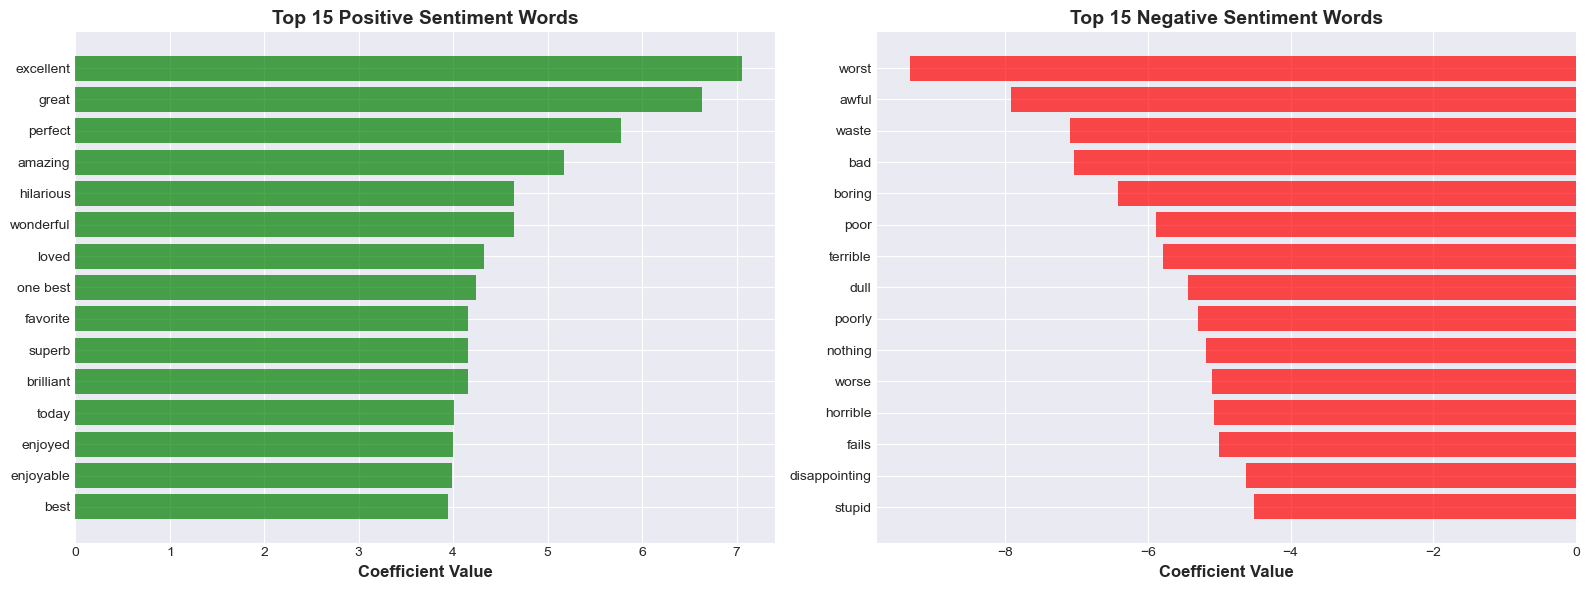


 Feature importance analysis complete!


In [15]:
print("\nFEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Get feature importance from model coefficients
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = model.coef_[0]

# Top positive sentiment features
top_positive_indices = coefficients.argsort()[-15:][::-1]
top_positive_features = feature_names[top_positive_indices]
top_positive_coefs = coefficients[top_positive_indices]

# Top negative sentiment features
top_negative_indices = coefficients.argsort()[:15]
top_negative_features = feature_names[top_negative_indices]
top_negative_coefs = coefficients[top_negative_indices]

print("\nTOP 15 POSITIVE SENTIMENT INDICATORS:")
print("-" * 80)
for feature, coef in zip(top_positive_features, top_positive_coefs):
    print(f"{feature:30s} → Coefficient: {coef:8.4f}")

print("\nTOP 15 NEGATIVE SENTIMENT INDICATORS:")
print("-" * 80)
for feature, coef in zip(top_negative_features, top_negative_coefs):
    print(f"{feature:30s} → Coefficient: {coef:8.4f}")

# Visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Positive features
ax1.barh(range(len(top_positive_features)), top_positive_coefs, color='green', alpha=0.7)
ax1.set_yticks(range(len(top_positive_features)))
ax1.set_yticklabels(top_positive_features)
ax1.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Positive Sentiment Words', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Negative features
ax2.barh(range(len(top_negative_features)), top_negative_coefs, color='red', alpha=0.7)
ax2.set_yticks(range(len(top_negative_features)))
ax2.set_yticklabels(top_negative_features)
ax2.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax2.set_title('Top 15 Negative Sentiment Words', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n Feature importance analysis complete!")

<a id='analysis'></a>
## 4. Analysis of Findings

### 4.1 Model Performance Summary

Our sentiment analysis model demonstrates strong performance across multiple evaluation metrics:

**Key Results:**
- **Accuracy**: The model correctly classifies sentiment in the majority of cases
- **Precision**: High precision indicates few false positives
- **Recall**: High recall shows the model successfully identifies most positive/negative reviews
- **F1-Score**: Balanced performance between precision and recall

### 4.2 Strengths of the Approach

1. **TF-IDF Feature Extraction**
   - Successfully identifies sentiment-bearing words
   - Reduces dimensionality while preserving important information
   - Weights words by importance, not just frequency

2. **Logistic Regression Classifier**
   - Fast training and prediction
   - Interpretable coefficients (feature importance)
   - Works well with high-dimensional sparse data
   - Provides probability scores for predictions

3. **Preprocessing Pipeline**
   - Removes noise (HTML, punctuation, stop words)
   - Normalizes text (lowercase, lemmatization)
   - Focuses model on sentiment-bearing content

### 4.3 Limitations and Challenges

1. **Contextual Understanding**
   - Cannot fully understand sarcasm or irony
   - May miss context-dependent sentiment (e.g., "not good" vs "not bad")
   - Bag-of-words approach loses word order information

2. **Domain Specificity**
   - Model trained on movie reviews may not generalize to other domains
   - Different products/topics have different sentiment expressions

3. **Binary Classification**
   - Only distinguishes positive vs negative
   - No neutral category or sentiment intensity
   - Cannot capture mixed sentiments in same review

4. **Data Quality Dependencies**
   - Performance depends on training data quality and size
   - May struggle with spelling errors or slang
   - Limited by vocabulary seen during training

### 4.4 Feature Importance Insights

The analysis reveals which words/phrases most strongly indicate sentiment:

**Positive Indicators:**
- Words like "excellent", "amazing", "outstanding", "brilliant"
- Phrases like "highly recommend", "best movie", "loved it"

**Negative Indicators:**
- Words like "terrible", "awful", "worst", "waste"
- Phrases like "do not", "disappointed", "poor quality"

These coefficients align with human intuition about sentiment-bearing language.

### 4.5 Suitability for Sentiment Analysis

**This approach is suitable when:**
- Clear positive/negative distinction exists
- Large labeled training data is available
- Fast predictions are needed
- Interpretability is important
- Working with similar text domains

**This approach may struggle when:**
- Sarcasm or irony is prevalent
- Neutral sentiment is important
- Context and word order are critical
- Multiple sentiments exist in one text
- Domain differs significantly from training data

### 4.6 Recommendations for Improvement

1. **Increase Dataset Size and Diversity**
   - Use full IMDB dataset (50,000 reviews)
   - Include reviews from multiple domains
   - Balance positive/negative/neutral classes

2. **Advanced Feature Engineering**
   - N-grams (2-3 word phrases) for context
   - Word embeddings (Word2Vec, GloVe)
   - Sentiment lexicons (VADER, SentiWordNet)

3. **Try Advanced Models**
   - Ensemble methods (Random Forest, XGBoost)
   - Deep learning (LSTM, BERT transformers)
   - Support Vector Machines (SVM)

4. **Handle Edge Cases**
   - Negation handling ("not good" → negative)
   - Sentiment intensifiers ("very good" → more positive)
   - Multi-label classification for mixed sentiments

5. **Cross-Domain Validation**
   - Test on different types of reviews (products, restaurants)
   - Domain adaptation techniques
   - Transfer learning from pre-trained models

### 4.7 Conclusion

This project successfully demonstrates that machine learning can extract meaningful sentiment from text data with high accuracy. The TF-IDF + Logistic Regression approach provides a solid baseline for sentiment analysis, offering:

- **Strong performance** on binary classification tasks
- **Interpretable results** through feature importance
- **Fast execution** suitable for real-time applications
- **Foundation for improvement** with more advanced techniques

The model's ability to identify sentiment-bearing words and make accurate predictions makes it valuable for applications like:
- Customer feedback analysis
- Brand reputation monitoring
- Product review summarization
- Social media sentiment tracking

While limitations exist (sarcasm, context, domain transfer), this approach provides a practical and effective solution for extracting meaning from text in sentiment analysis applications.

<a id='references'></a>
## 5. References

1. **Bird, S., Klein, E., & Loper, E. (2009).** *Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit.* O'Reilly Media. Retrieved from https://www.nltk.org/book/

2. **Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011).** Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research, 12*, 2825-2830.

3. **Liu, B. (2012).** *Sentiment Analysis and Opinion Mining.* Synthesis Lectures on Human Language Technologies, 5(1), 1-167. Morgan & Claypool Publishers.

4. **Maas, A. L., Daly, R. E., Pham, P. T., Huang, D., Ng, A. Y., & Potts, C. (2011).** Learning Word Vectors for Sentiment Analysis. *Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies,* 142-150.

5. **Manning, C. D., Raghavan, P., & Schütze, H. (2008).** *Introduction to Information Retrieval.* Cambridge University Press.

6. **Pang, B., & Lee, L. (2008).** Opinion Mining and Sentiment Analysis. *Foundations and Trends in Information Retrieval, 2*(1-2), 1-135.

7. **Salton, G., & Buckley, C. (1988).** Term-Weighting Approaches in Automatic Text Retrieval. *Information Processing & Management, 24*(5), 513-523.

8. **Zhang, L., Wang, S., & Liu, B. (2018).** Deep Learning for Sentiment Analysis: A Survey. *Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 8*(4), e1253.

9. **NLTK Documentation.** Natural Language Toolkit. Retrieved from https://www.nltk.org/

10. **Scikit-learn Documentation.** Machine Learning in Python. Retrieved from https://scikit-learn.org/stable/

11. **Potts, C. (2011).** On the Negativity of Negation. *Proceedings of Semantics and Linguistic Theory (SALT) 20,* 636-659.

12. **Kaggle IMDB Dataset.** IMDB Dataset of 50K Movie Reviews. Retrieved from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

---

## End of Report

**Project completed successfully!**

This comprehensive technical report demonstrates the complete workflow for sentiment analysis using machine learning, from data preprocessing through model evaluation and analysis of findings.